In [1]:
# Import libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
import datetime


# Pretty display for notebooks

%matplotlib inline


# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
weather = pd.read_csv("../asset/weather.csv")

# Success - Display the first record
import pickle
import awesome_functions as cf

# 원본을 유지하기 위해서 카피
df_weather = weather.copy()

cmap = sns.light_palette("orange", as_cmap=True)

In [5]:
station_17 = cf.getSpecifiedWeatherData(df_weather, 17)

In [3]:
cf.isThereNoneData(station_17)

M Data over 60% : ['depart']
T Data over 60% : []
B Data over 60% : ['sunrise', 'sunset']


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,1035,0,0.00,0,0.00,0,0.0
1,date,1035,0,0.00,0,0.00,0,0.0
2,tmax,1035,1,0.10,0,0.00,0,0.0
3,tmin,1035,1,0.10,0,0.00,0,0.0
4,tavg,1035,5,0.48,0,0.00,0,0.0
5,depart,1035,1035,100.00,0,0.00,0,0.0
6,dewpoint,1035,1,0.10,0,0.00,0,0.0
7,wetbulb,1035,9,0.87,0,0.00,0,0.0
8,heat,1035,5,0.48,0,0.00,0,0.0
9,cool,1035,5,0.48,0,0.00,0,0.0


In [6]:
station_17_t = cf.remove_columns(station_17, ["sunrise", "sunset", "depart"])

제거한 컬럼명 : ['sunrise', 'sunset', 'depart']


In [7]:
station_17_t = cf.remove_m_row(station_17, ["tmax", "tmin", "tavg"])
print("")
station_17_dropped_all = cf.remove_m_row(station_17)

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'tavg']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg']
제거한 float 컬럼 : []
제거한 후 데이터프레임 length : 1030

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 962


## 온도 컬럼만 m 벨류 제거함

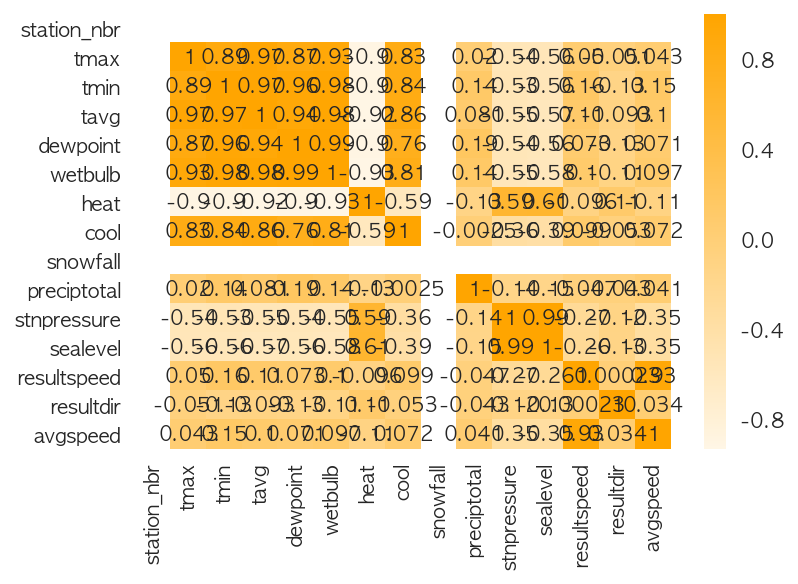

In [9]:
cols = station_17_dropped_all.columns
sns.heatmap(station_17_dropped_all[cols].corr(), annot=True, cmap=cmap)
plt.show()

In [7]:
station_4_dew_wet = cf.remove_m_row(station_4, ["dewpoint", "wetbulb"])

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['dewpoint', 'wetbulb']
제거한 int 컬럼 : ['dewpoint', 'wetbulb']
제거한 float 컬럼 : []
제거한 후 데이터프레임 length : 1020


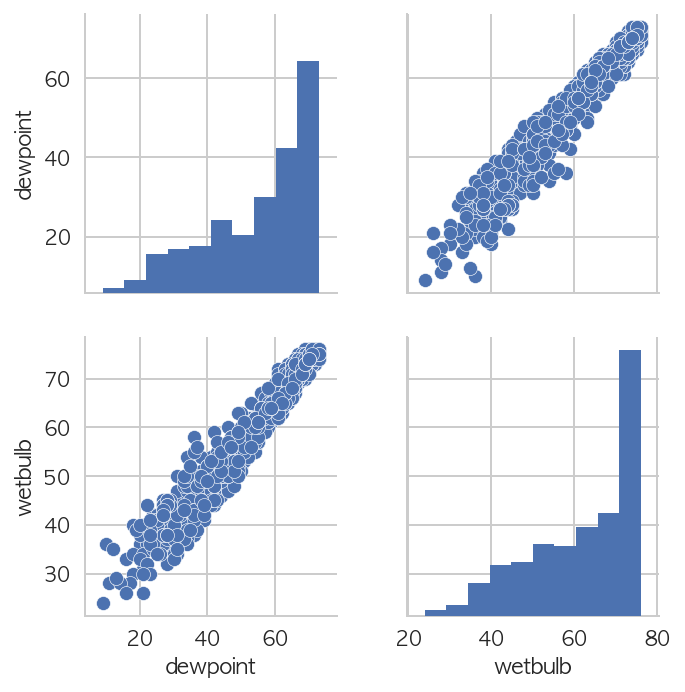

In [8]:
col_dw = ["dewpoint", "wetbulb"]
sns.pairplot(station_4_dew_wet[col_dw])
plt.show()

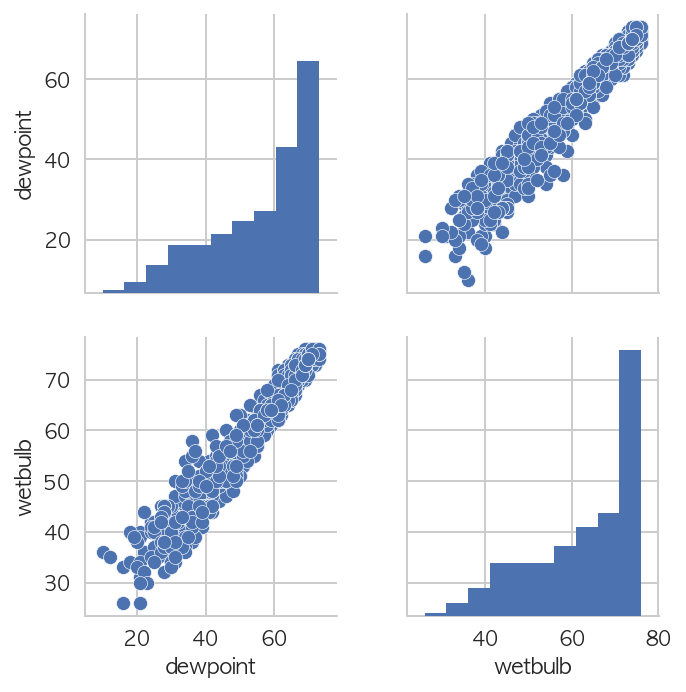

In [9]:
sns.pairplot(station_4_dropped_all[col_dw])
plt.show()

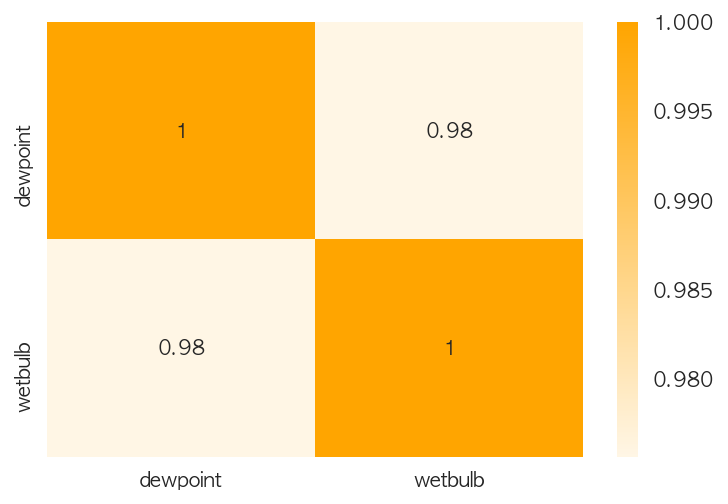

In [10]:
sns.heatmap(station_4_dew_wet[col_dw].corr(), annot=True, cmap=cmap)
plt.show()

1. tmax, tmin, tavg, depart
2. dewpoint, wetbulb, 
3. heat, cool, sunrise, sunset
4. snowfall, preciptotal, stnpressure, sealevel
5. resultspeed, resultdir, avgspeed

In [11]:
station_4_h_c = cf.remove_m_row(station_4, ["heat", "cool"])

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['heat', 'cool']
제거한 int 컬럼 : ['heat', 'cool']
제거한 float 컬럼 : []
제거한 후 데이터프레임 length : 1025


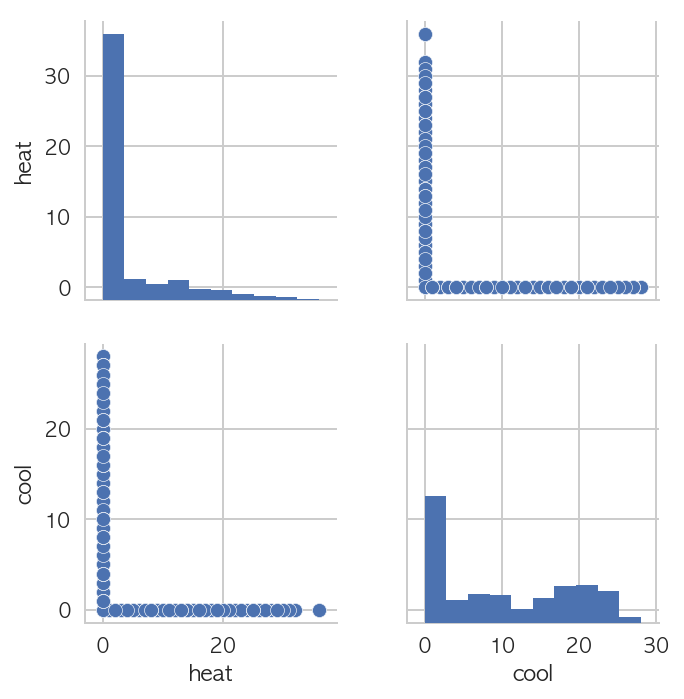

In [12]:
col_h_c = ["heat", "cool"]
sns.pairplot(station_4_h_c[col_h_c])
plt.show()

In [13]:
station_4_p_p = cf.remove_m_row(station_4, ["preciptotal", "stnpressure", "sealevel"])

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['preciptotal', 'stnpressure', 'sealevel']
제거한 int 컬럼 : []
제거한 float 컬럼 : ['preciptotal', 'stnpressure', 'sealevel']
제거한 후 데이터프레임 length : 1015


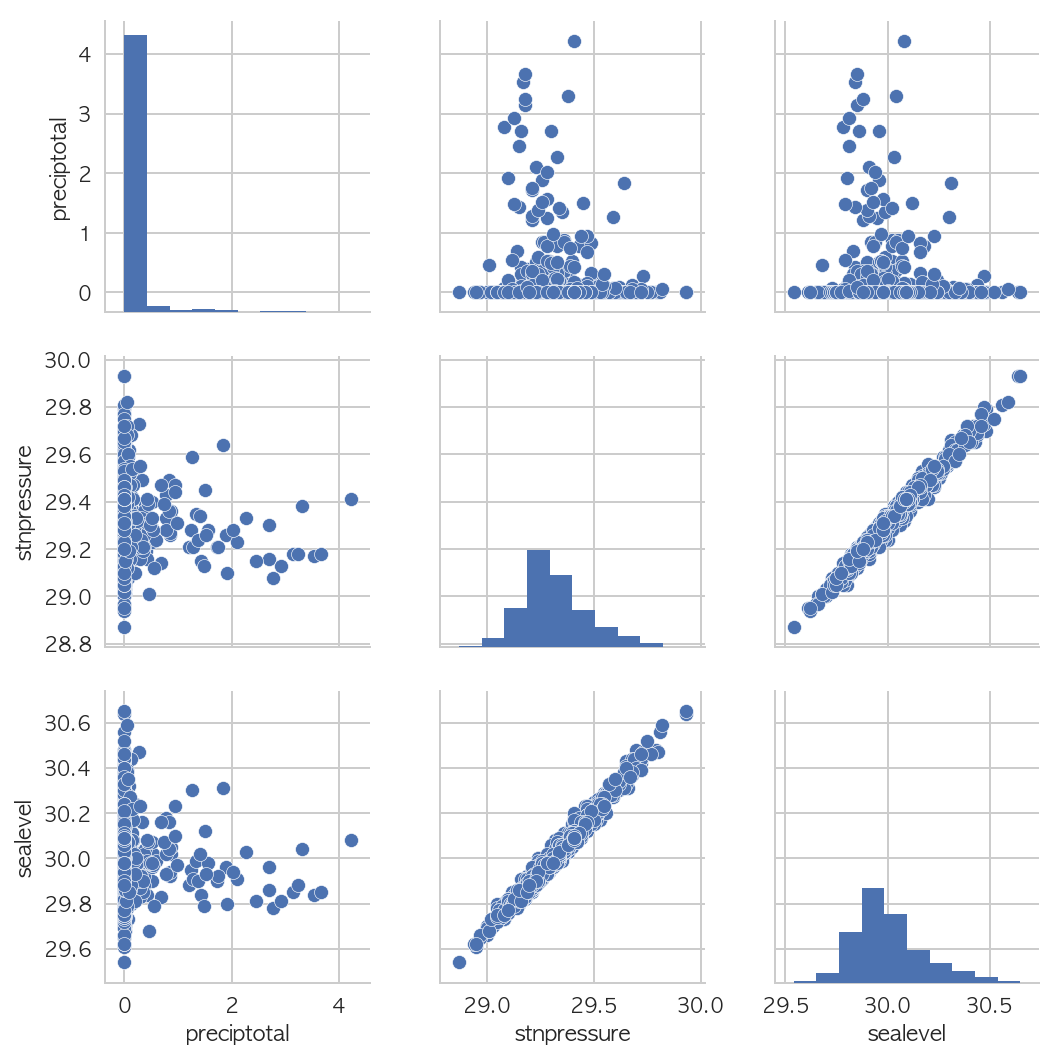

In [14]:
col_p_p = ["preciptotal", "stnpressure", "sealevel"]
sns.pairplot(station_4_p_p[col_p_p])
plt.show()

In [15]:
col_wind = ["resultspeed", "resultdir", "avgspeed"]
station_4_wind = cf.remove_m_row(station_4, col_wind)

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : []
제거한 float 컬럼 : ['resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 1027


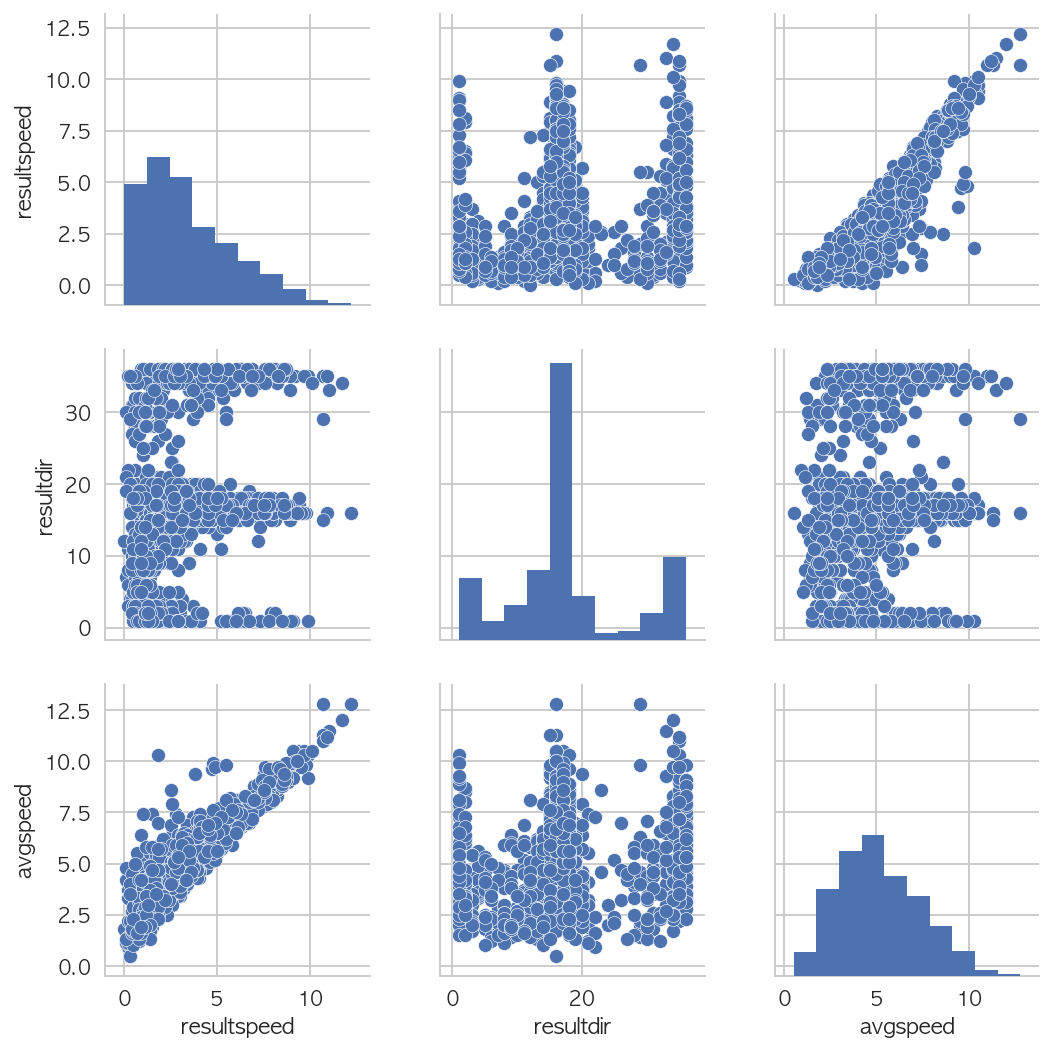

In [16]:
sns.pairplot(station_4_wind[col_wind])
plt.show()